<a href="https://colab.research.google.com/github/druggablegenome/idg-cfde/blob/main/python/CFDE_IDG_DrugCentral_STRIDES_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://druggablegenome.net/IDG_Images_Index/DRGC.png" height="100">
<img align="right" src="https://www.nih-cfde.org/wp-content/uploads/2020/11/CFDE_logo-color-web.png" width="200">

# CFDE-IDG DrugCentral STRIDES Demo

* https://www.nih-cfde.org/
* https://druggablegenome.net

In this simple CFDE-IDG demo we pull DrugCentral data from AWS S3 cloud storage provided via NIH STRIDES, for display, analysis and integration with related entities and datasets.

## Imports

In [1]:
import sys,os,io,json,requests,urllib.request
import pandas as pd
from IPython.display import Image

## Configuration

In [2]:
bucket_id = "kmc-idg"
bucket_host = f"{bucket_id}.s3.amazonaws.com"
url_basepath = "unm/drugcentral"
dc_id = 2358

## Request DrugPage file from AWS S3 bucket

In [3]:
filename = f"drugcentral_drug_{dc_id:05d}.json"
response = requests.get(f"https://{bucket_host}/{url_basepath}/{filename}")
drugpage = response.json()
pd.DataFrame.from_dict({key:[str(val)] for key,val in drugpage.items()}).transpose()

,0
id,2358
name,ranitidine
cas_reg_no,66357-35-5
smiles,CNC(NCCSCC1=CC=C(CN(C)C)O1)=C[N+]([O-])=O
inchikey,VMXUWOKSQNHOCA-UHFFFAOYSA-N
inchi,InChI=1S/C13H22N4O3S/c1-14-13(9-17(18)19)15-6-...
formula,C13H22N4O3S
molweight,314.4
xrefs,"[{'xref_type': 'KEGG_DRUG', 'xref': 'D00422'},..."
synonyms,"['ranitidine', 'ranitidine HCl', 'ranitidine h..."


## Depict structure from SMILES

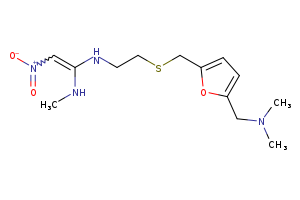

In [4]:
url = f"https://datascience.unm.edu/tomcat/biocomp/mol2img?smiles={urllib.request.quote(drugpage['smiles'])}"
Image(requests.get(url).content)

## Synonyms

In [9]:
synonyms = pd.DataFrame.from_dict(drugpage['synonyms'])
synonyms

,0
0,ranitidine
1,ranitidine HCl
2,ranitidine hydrochloride
3,zantac
4,zenetac


## Cross-refs (IDs)

In [5]:
xrefs = pd.DataFrame.from_dict(drugpage['xrefs'])
xrefs

,xref_type,xref
0,KEGG_DRUG,D00422
1,SECONDARY_CAS_RN,66357-59-3
2,VANDF,4018896
3,VANDF,4019927
4,UMLSCUI,C0034665
5,CHEBI,CHEBI:8776
6,ChEMBL_ID,CHEMBL1790041
7,ChEMBL_ID,CHEMBL2110372
8,MESH_DESCRIPTOR_UI,D011899
9,DRUGBANK_ID,DB00863


## Targets

In [6]:
targets = pd.DataFrame.from_dict(drugpage['targets'])
targets

,target_id,target_name,gene,action_type,act_source,act_type,act_comment,relation,moa,moa_source,moa_source_url,ref_pmid,ref_doi,ref_title,ref_year
0,111,Histamine H2 receptor,HRH2,ANTAGONIST,WOMBAT-PK,Kd,None,=,1.0,CHEMBL,https://www.ebi.ac.uk/chembl/compound/inspect/...,None,None,None,None
1,251,Acetylcholinesterase,ACHE,None,CHEMBL,IC50,Inhibition of guinea pig acetylcholinesterase,=,NaN,None,None,None,None,None,None
2,1747,Histamine H2 receptor,HRH2,None,CHEMBL,Kd,Compound was evaluated in vitro inhibitory act...,=,NaN,None,None,None,None,None,None
3,2494,Multidrug and toxin extrusion protein 1,SLC47A1,None,CHEMBL,IC50,Inhibition of human MATE1-mediated ASP+ uptake...,=,NaN,None,None,None,None,None,None
4,3593,Histamine H2 receptor,Hrh2,ANTAGONIST,IUPHAR,Ki,None,=,NaN,None,None,None,None,None,None


## Products

In [7]:
products = pd.DataFrame.from_dict(drugpage['products'])
products

,product_id,ndc_product_code,product_form,product_generic_name,product_name,product_route,product_marketing_status,product_active_ingredient_count
0,2381628,21695-109,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
1,2381629,21695-110,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
2,2381740,67046-650,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
3,2381878,53808-0774,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
4,2381883,53808-0775,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
...,...,...,...,...,...,...,...,...
261,2503573,62207-773,TABLET,Ranitidine,Ranitidine,ORAL,ANDA,1
262,2503574,62207-774,TABLET,Ranitidine,Ranitidinecool mint,ORAL,ANDA,1
263,2504568,68071-5012,"TABLET, FILM COATED",Ranitidine,ACID REDUCER,ORAL,ANDA,1
264,2506301,53943-741,"TABLET, FILM COATED",Ranitidine,HEARTBURN RELIEVER 150Maximum Strength,ORAL,ANDA,1


## Indications

In [8]:
indications = pd.DataFrame.from_dict(drugpage['indications'])
indications

,omop_concept_id,omop_concept_name,umls_cui,umls_semantic_type,snomed_conceptid,snomed_full_name
0,21001993,Erosive esophagitis,C0267055,T047,40719004.0,Erosive esophagitis
1,21002024,Duodenal ulcer disease,C0013295,T047,51868009.0,Duodenal ulcer disease
2,21000608,Zollinger-Ellison syndrome,C0043515,T047,53132006.0,Zollinger-Ellison syndrome
3,21002059,Indigestion,C0013395,T184,162031009.0,Indigestion
4,21001999,Gastroesophageal reflux disease,C0017168,T047,235595009.0,Gastroesophageal reflux disease
5,21003230,Heartburn,C0018834,T184,16331000.0,Heartburn
6,21002013,Gastric ulcer,C0038358,T047,397825006.0,Gastric ulcer
7,21002015,Maintenance of Healing Gastric Ulcer,None,None,NaN,None
8,21002055,Gastric Hypersecretory Conditions,None,None,NaN,None
9,21002025,Duodenal Ulcer due to H. Pylori,None,None,NaN,None
